# EECS 442 Homework 4: Fashion-MNIST Classification
In this part, you will implement and train Convolutional Neural Networks (ConvNets) in PyTorch to classify images. Unlike HW4 Secion 1, backpropagation is automatically inferred by PyTorch, so you only need to write code for the forward pass.

Before we start, please put your name and UMID in following format

: Firstname LASTNAME, #00000000   //   e.g.) David FOUHEY, #12345678

**Your Answer:**   
Hello EECS442 #12345678

## Setup

In [ ]:
# Run the command in the terminal if it failed on local Jupyter Notebook, remove "!" before each line
!pip install torchsummary

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # Displays a progress bar

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
from torch.utils.data import Dataset, Subset, DataLoader, random_split

In [3]:
if torch.cuda.is_available():
    print("Using the GPU. You are good to go!")
    device = 'cuda'
else:
    print("Using the CPU. Overall speed may be slowed down")
    device = 'cpu'

Using the CPU. Overall speed may be slowed down


## Loading Dataset
The dataset we use is Fashion-MNIST dataset, which is available at https://github.com/zalandoresearch/fashion-mnist and in torchvision.datasets. Fashion-MNIST has 10 classes, 60000 training+validation images (we have splitted it to have 50000 training images and 10000 validation images, but you can change the numbers), and 10000 test images.

In [4]:
# Load the dataset and train, val, test splits
print("Loading datasets...")
# Transform from [0,255] uint8 to [0,1] float,
# then normalize to zero mean and unit variance
FASHION_transform = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize([0.2859], [0.3530]) 
                    ])
FASHION_trainval = datasets.FashionMNIST('.', download=True, train=True,
                                         transform=FASHION_transform)
FASHION_train = Subset(FASHION_trainval, range(50000))
FASHION_val = Subset(FASHION_trainval, range(50000, 60000))
FASHION_test = datasets.FashionMNIST('.', download=True, train=False,
                                     transform=FASHION_transform)
print("Done!")

Loading datasets...


100%|█████████████████████████████████████████████████████████████████| 26421880/26421880 [00:21<00:00, 1209859.95it/s]


Extracting .\FashionMNIST\raw\train-images-idx3-ubyte.gz to .\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 1742632.67it/s]

Extracting .\FashionMNIST\raw\train-labels-idx1-ubyte.gz to .\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████| 4422102/4422102 [00:03<00:00, 1225815.00it/s]


Extracting .\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to .\FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<?, ?it/s]

Extracting .\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to .\FashionMNIST\raw

Done!


Now, we will create the dataloder for train, val and test dataset. You are free to experiment with different batch sizes.

In [5]:
# Create dataloaders
##############################################################################
# TODO: Experiment with different batch sizes                                #
##############################################################################
batch_size=32
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################
trainloader = DataLoader(FASHION_train, batch_size=batch_size, shuffle=True)
valloader = DataLoader(FASHION_val, batch_size=batch_size, shuffle=True)
testloader = DataLoader(FASHION_test, batch_size=batch_size, shuffle=True)

## Model
Initialize your model and experiment with with different optimizers, parameters (such as learning rate) and number of epochs.

In [9]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        ##############################################################################
        # TODO: Design your own network, define layers here.                          #
        # Here We provide a sample of two-layer fc network from HW4 Part3.           #
        # Your solution, however, should contain convolutional layers.               #
        # Refer to PyTorch documentations of torch.nn to pick your layers.           #
        # (https://pytorch.org/docs/stable/nn.html)                                  #
        # Some common choices: Linear, Conv2d, ReLU, MaxPool2d, AvgPool2d, Dropout   #
        # If you have many layers, use nn.Sequential() to simplify your code         #
        ##############################################################################
        # from 28x28 input image to hidden layer of size 256
#         self.fc1 = nn.Linear(28*28, 8) 
        # from hidden layer to 10 class scores
#         self.fc2 = nn.Linear(8,10) 
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(32 * 7 * 7, 10) # Assuming input image size is 28x28


        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################
  
    def forward(self, x):
        ##############################################################################
        # TODO: Design your own network, implement forward pass here                 # 
        ##############################################################################
#         x = x.to(device)
        # Flatten each image in the batch
#         x = x.view(-1,28*28) 
#         x = self.fc1(x)
        # No need to define self.relu because it contains no parameters
#         relu = nn.ReLU() 
#         x = relu(x)
#         x = self.fc2(x)
        # The loss layer will be applied outside Network class
    
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

model = Network().to(device)
criterion = nn.CrossEntropyLoss() # Specify the loss layer
print('Your network:')
print(summary(model, (1,28,28), device=device)) # visualize your model

##############################################################################
# TODO: Modify the lines below to experiment with different optimizers,      #
# parameters (such as learning rate) and number of epochs.                   #
##############################################################################
# Set up optimization hyperparameters
learning_rate = 1e-3
weight_decay = 1e-5
num_epoch = 10  # TODO: Choose an appropriate number of training epochs
optimizer = optim.Adam(model.parameters(), lr=learning_rate,
                       weight_decay=weight_decay) # Try different optimizers
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

Your network:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]           4,640
              ReLU-5           [-1, 32, 14, 14]               0
         MaxPool2d-6             [-1, 32, 7, 7]               0
            Linear-7                   [-1, 10]          15,690
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.32
Params size (MB): 0.08
Estimated Total Size (MB): 0.40
----------------------------------------------------------------
None


Run the cell below to start your training, we expect you to achieve over **85%** on the test set. A valid solution that meet the requirement take no more than **10 minutes** on normal PC Intel core CPU setting. If your solution takes too long to train, try to simplify your model or reduce the number of epochs.

In [10]:
%%time
def train(model, trainloader, valloader, num_epoch=10):  # Train the model
    print("Start training...")
    trn_loss_hist = []
    trn_acc_hist = []
    val_acc_hist = []
    model.train()  # Set the model to training mode
    for i in range(num_epoch):
        running_loss = []
        print('-----------------Epoch = %d-----------------' % (i+1))
        for batch, label in tqdm(trainloader):
            batch = batch.to(device)
            label = label.to(device)
            optimizer.zero_grad()  # Clear gradients from the previous iteration
            # This will call Network.forward() that you implement
            pred = model(batch)
            loss = criterion(pred, label)  # Calculate the loss
            running_loss.append(loss.item())
            loss.backward()  # Backprop gradients to all tensors in the network
            optimizer.step()  # Update trainable weights
        print("\n Epoch {} loss:{}".format(i+1, np.mean(running_loss)))

        # Keep track of training loss, accuracy, and validation loss
        trn_loss_hist.append(np.mean(running_loss))
        trn_acc_hist.append(evaluate(model, trainloader))
        print("\n Evaluate on validation set...")
        val_acc_hist.append(evaluate(model, valloader))
    print("Done!")
    return trn_loss_hist, trn_acc_hist, val_acc_hist


def evaluate(model, loader):  # Evaluate accuracy on validation / test set
    model.eval()  # Set the model to evaluation mode
    correct = 0
    with torch.no_grad():  # Do not calculate grident to speed up computation
        for batch, label in tqdm(loader):
            batch = batch.to(device)
            label = label.to(device)
            pred = model(batch)
            correct += (torch.argmax(pred, dim=1) == label).sum().item()
        acc = correct/len(loader.dataset)
        print("\n Evaluation accuracy: {}".format(acc))
        return acc


trn_loss_hist, trn_acc_hist, val_acc_hist = train(model, trainloader,
                                                  valloader, num_epoch)

##############################################################################
# TODO: Note down the evaluation accuracy on test set                        #
##############################################################################
print("\n Evaluate on test set")
evaluate(model, testloader)

Start training...
-----------------Epoch = 1-----------------


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:31<00:00, 49.02it/s]



 Epoch 1 loss:0.4333269604394166


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:22<00:00, 71.00it/s]



 Evaluation accuracy: 0.89218

 Evaluate on validation set...


100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [00:04<00:00, 67.81it/s]



 Evaluation accuracy: 0.8813
-----------------Epoch = 2-----------------


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:33<00:00, 46.12it/s]



 Epoch 2 loss:0.3028206470626825


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:23<00:00, 66.62it/s]



 Evaluation accuracy: 0.90248

 Evaluate on validation set...


100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [00:04<00:00, 69.59it/s]



 Evaluation accuracy: 0.8913
-----------------Epoch = 3-----------------


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:33<00:00, 46.42it/s]



 Epoch 3 loss:0.2633954188795385


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:23<00:00, 65.33it/s]



 Evaluation accuracy: 0.91872

 Evaluate on validation set...


100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [00:04<00:00, 64.32it/s]



 Evaluation accuracy: 0.9031
-----------------Epoch = 4-----------------


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:32<00:00, 47.50it/s]



 Epoch 4 loss:0.23928634420881


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:22<00:00, 70.03it/s]



 Evaluation accuracy: 0.92092

 Evaluate on validation set...


100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [00:04<00:00, 73.33it/s]



 Evaluation accuracy: 0.9042
-----------------Epoch = 5-----------------


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:31<00:00, 49.94it/s]



 Epoch 5 loss:0.22224989818303023


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:21<00:00, 73.08it/s]



 Evaluation accuracy: 0.92884

 Evaluate on validation set...


100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [00:04<00:00, 72.01it/s]



 Evaluation accuracy: 0.9039
-----------------Epoch = 6-----------------


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:33<00:00, 45.97it/s]



 Epoch 6 loss:0.20391865742767631


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:21<00:00, 72.32it/s]



 Evaluation accuracy: 0.9357

 Evaluate on validation set...


100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [00:04<00:00, 76.26it/s]



 Evaluation accuracy: 0.9111
-----------------Epoch = 7-----------------


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:31<00:00, 50.13it/s]



 Epoch 7 loss:0.19137462661247068


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:21<00:00, 72.93it/s]



 Evaluation accuracy: 0.93598

 Evaluate on validation set...


100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [00:04<00:00, 69.96it/s]



 Evaluation accuracy: 0.9064
-----------------Epoch = 8-----------------


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:31<00:00, 50.07it/s]



 Epoch 8 loss:0.17918073483972177


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:22<00:00, 69.66it/s]



 Evaluation accuracy: 0.94704

 Evaluate on validation set...


100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [00:04<00:00, 72.67it/s]



 Evaluation accuracy: 0.9128
-----------------Epoch = 9-----------------


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:31<00:00, 49.48it/s]



 Epoch 9 loss:0.17029513551639686


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:22<00:00, 70.36it/s]



 Evaluation accuracy: 0.94654

 Evaluate on validation set...


100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [00:04<00:00, 73.15it/s]



 Evaluation accuracy: 0.9092
-----------------Epoch = 10-----------------


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:33<00:00, 46.84it/s]



 Epoch 10 loss:0.16262698704192102


100%|██████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:24<00:00, 64.01it/s]



 Evaluation accuracy: 0.93684

 Evaluate on validation set...


100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [00:05<00:00, 61.04it/s]



 Evaluation accuracy: 0.8989
Done!

 Evaluate on test set


100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [00:04<00:00, 71.67it/s]


 Evaluation accuracy: 0.8943
CPU times: total: 43min 27s
Wall time: 9min 59s


0.8943

Once your training is complete, run the cell below to visualize the training and validation accuracies across iterations.

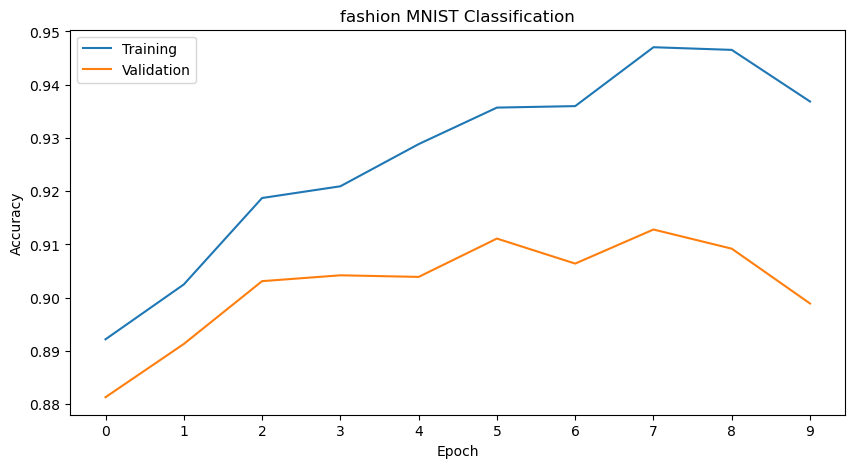

In [11]:
##############################################################################
# TODO: Submit the accuracy plot                                             #
##############################################################################
# visualize the training / validation accuracies
x = np.arange(num_epoch)
# train/val accuracies for MiniVGG
plt.figure()
plt.plot(x, trn_acc_hist)
plt.plot(x, val_acc_hist)
plt.legend(['Training', 'Validation'])
plt.xticks(x)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('fashion MNIST Classification')
plt.gcf().set_size_inches(10, 5)
plt.savefig('part1.png', dpi=300)
plt.show()